# 2. Introduction to msprime

1. Why use msprime?
2. Getting started
3. Recombination
4. Mutation
5. Population structure
6. Demographic events
7. Large simulations
8. Exporting to other data formats

## 2.1 Why use msprime?

This notebook introduces, `msprime`, an reimplementation of Hudson's `ms` program for simulating genomic datasets under the coalescent model with recombination. Because it simulates datasets with the tree sequence structure, `msprime` is much more computationally efficient than many other simulation softwares. We will see that it can easily simulate chromosome-sized regions for hundreds of thousands of samples.
 
In later workshops, we will show how simulations with `msprime` can be used to explore the influence of various historical scenarios on observed patterns of genetic variation and inheritance.
 
 ### The coalescent model with recombination
 
 Blurby summary of what the coalescent model is.
 Maybe put some references here? Or, could make a picture?
 
 some important assumptions:
 - infinite sites
 - infinite times
 - small sample size relative to population
 - No selection

## 2.2 Getting started

In [1]:
import msprime
from IPython.display import SVG

### A simple simulation

 - Minimal input into msprime is a sample size
 - Let's simulate 6 chromosomes to start off with.
 - We'll use this to illustrate some basic features of msprime simulations.

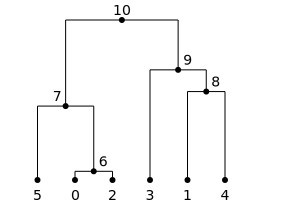

In [2]:
ts = msprime.simulate(sample_size = 6, random_seed =1)

for tree in ts.trees():
    display(SVG(tree.draw(width=300)))

Only a single tree. This is default behaviour because no recombination as yet. Because we have not specified a sequence length, will be 1 by default. (Can think of this as the local tree at a single nucleotide base).

Looking at the generated ancestral nodes, notice that they have non-integer times. This is an assumption of the coalescent model:
Note that under msprime, time is measured in units of generations. 

In trees generated by msprime, the times are recorded in units of generations.
One coalescence of lineages at each location. (Infinite times?)

### Random seeds

Coalescent events (as well as mutation events, recombination events, etc) are realisations of a random process.
So, when you run msprime many different times, you'll see different trees.

In many situations (for example - in tutorials!), it may be useful to be able to replicate the same output each time.
To ensure the same output, you can specify a random seed. 

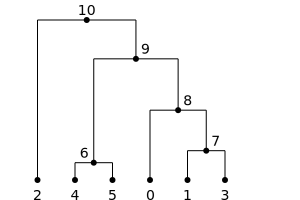

In [3]:
ts = msprime.simulate(sample_size = 6, random_seed = 10)

for tree in ts.trees():
    display(SVG(tree.draw(width=300)))

## 2.3 Recombination

### Uniform recombination

To specify recombination, need two extra bits of information: a sequence length (usually specified as a number of bases) and a recombination rate (specified as the rate of crossing over per unit of length per generation).

Tree on interval (0.0, 181.74732201307717)


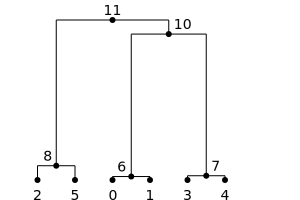

Tree on interval (181.74732201307717, 1000.0)


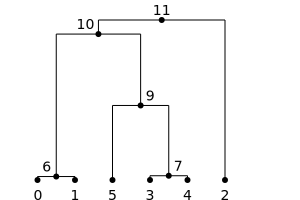

In [4]:
ts = msprime.simulate(sample_size = 6, random_seed = 12,
                     length = 1000, recombination_rate = 1e-4 )

for tree in ts.trees():
    print('Tree on interval', tree.interval)
    display(SVG(tree.draw(width=300)))

A consequence of the infinite sites assumption is that crossover positions will be floating point numbers. 

### Non-uniform recombination

Also possible to use an external recombination map. 
To do this, replace the two existing parameters with a recombination_map. (The sequence length will be learnt from the positions in the map.

The recombination rate must be given as a RecombinationMap object.
(Features: length of positions and lengths are the same, rate is the per-base rate of recombination)

Tree on interval (0.0, 249.06398236496932)


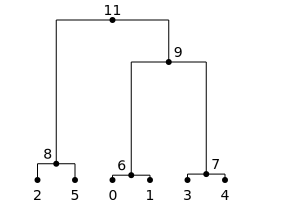

Tree on interval (249.06398236496932, 849.2285334503345)


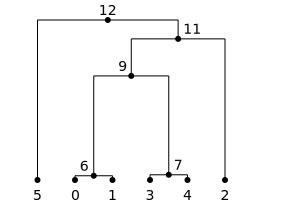

Tree on interval (849.2285334503345, 1000.0)


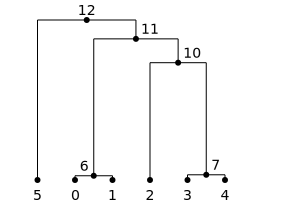

In [5]:
map_positions = [i*100 for i in range(0, 11)]
map_rates = [0, 1e-4, 5e-4, 1e-4, 0, 0, 0, 5e-4, 6e-4, 1e-4, 0]
my_map = msprime.RecombinationMap(map_positions, map_rates)

ts = msprime.simulate(sample_size = 6, random_seed = 12, recombination_map = my_map)
for tree in ts.trees():
    print('Tree on interval', tree.interval)
    display(SVG(tree.draw(width=300)))

### Integer breakpoints

Get help from Jerome on this.

In [6]:
# map_positions = [i*100 for i in range(0, 11)]
# map_rates = [0, 1e-4, 5e-4, 1e-4, 0, 0, 0, 5e-4, 6e-4, 1e-4, 0]
# my_map = msprime.RecombinationMap(map_positions, map_rates, num_loci = 1000)

# ts = msprime.simulate(sample_size = 6, random_seed = 12, recombination_map = my_map)
# for tree in ts.trees():
#     print(tree.interval)

## 2.4 Mutation

Per base mutation rate.

Tree on interval (0.0, 181.74732201307717)


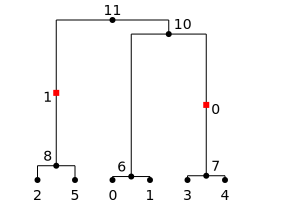

Tree on interval (181.74732201307717, 1000.0)


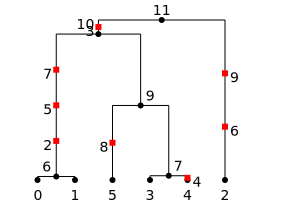

In [7]:
ts = msprime.simulate(sample_size = 6, random_seed = 12,
                     length = 1000, recombination_rate = 1e-4,
                     mutation_rate = 7e-4)

for tree in ts.trees():
    print('Tree on interval', tree.interval)
    display(SVG(tree.draw(width=300)))

In [8]:
print(ts.tables.mutations)

id	site	node	derived_state	parent	metadata
0	0	7	1	-1	
1	1	8	1	-1	
2	2	6	1	-1	
3	3	10	1	-1	
4	4	4	1	-1	
5	5	6	1	-1	
6	6	2	1	-1	
7	7	6	1	-1	
8	8	5	1	-1	
9	9	2	1	-1	


Can be iterated through 1 at a time:

In [9]:
for var in ts.variants():
    print(var.genotypes)

[0 0 0 1 1 0]
[0 0 1 0 0 1]
[1 1 0 0 0 0]
[1 1 0 1 1 1]
[0 0 0 0 1 0]
[1 1 0 0 0 0]
[0 0 1 0 0 0]
[1 1 0 0 0 0]
[0 0 0 0 0 1]
[0 0 1 0 0 0]


Or all at once (though, this can be very big)

In [10]:
ts.genotype_matrix()

array([[0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 0, 1],
       [1, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1],
       [0, 0, 0, 0, 1, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]], dtype=uint8)

## 2.5 Populations and population structure

### PopulationConfiguration objects

## 2.6 Demographic events

### Migrations

### Population size changes

### Using the Demography Debugger

## 2.7 Large simulations

### Replicate simulations

## 2.8 Exporting data into other formats